In [1]:
import pickle

# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dict = pd.read_pickle('/Users/ypi/PycharmProjects/pythonProject/final_project_dataset.pkl')


In [3]:
# data type and length 

print(type(data_dict))
print(len(data_dict))


<class 'dict'>
146


In [4]:
## number of feature 
len(data_dict['METTS MARK'].keys())

21

In [5]:
## check the balance of data 
poi_list=[]
non_poi_list=[]

for person in data_dict:
    if data_dict[person]['poi']:
        poi_list.append(person)
    else:
        non_poi_list.append(person)
        
print('There are',len(poi_list),'poi in this dataset')
print('There are',len(non_poi_list),'non-poi in this dataset')

# a very inbalance dataset 
# first thought acc not the best evaluation
# make it balance??

There are 18 poi in this dataset
There are 128 non-poi in this dataset


In [6]:
## make it to dataframe 

df = pd.DataFrame.from_dict(data_dict,orient='index')
df.head()
print(df[df['poi']==True].poi.count())
print(df[df['poi']==False].bonus.count())

18
128


In [7]:
df.describe()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146
unique,95,87,40,126,5,42,112,19,45,125,...,58,102,65,93,42,2,53,84,98,18
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
freq,51,60,107,21,142,64,35,128,97,20,...,60,44,60,53,60,128,80,60,36,129


In [8]:
features_to_check = []
for col in df.columns:
    datatype = type(df[col][0])
    ## Uncomment the line below for a verbose mode:
    # print '{} has type {}'.format(col,datatype)
    ## Here we select those attributes which have string type data:
    if datatype is str:
        features_to_check.append(col)
features_to_check

['deferral_payments',
 'loan_advances',
 'email_address',
 'restricted_stock_deferred',
 'deferred_income',
 'exercised_stock_options',
 'long_term_incentive',
 'director_fees']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   salary                     146 non-null    object
 1   to_messages                146 non-null    object
 2   deferral_payments          146 non-null    object
 3   total_payments             146 non-null    object
 4   loan_advances              146 non-null    object
 5   bonus                      146 non-null    object
 6   email_address              146 non-null    object
 7   restricted_stock_deferred  146 non-null    object
 8   deferred_income            146 non-null    object
 9   total_stock_value          146 non-null    object
 10  expenses                   146 non-null    object
 11  from_poi_to_this_person    146 non-null    object
 12  exercised_stock_options    146 non-null    object
 13  from_messages              146 non-null    object

In [10]:
## missing value

df.isnull().sum()

salary                       0
to_messages                  0
deferral_payments            0
total_payments               0
loan_advances                0
bonus                        0
email_address                0
restricted_stock_deferred    0
deferred_income              0
total_stock_value            0
expenses                     0
from_poi_to_this_person      0
exercised_stock_options      0
from_messages                0
other                        0
from_this_person_to_poi      0
poi                          0
long_term_incentive          0
shared_receipt_with_poi      0
restricted_stock             0
director_fees                0
dtype: int64

In [11]:
for col in df:
    df[col] = df[col].apply(lambda x: np.NaN if x=='NaN' else x)
    
    
    
#df.col.apply(lambda x: np.NaN if x=='NaN' else x)

In [12]:
df.info()
# since there are many missing value

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary                     95 non-null     float64
 1   to_messages                86 non-null     float64
 2   deferral_payments          39 non-null     float64
 3   total_payments             125 non-null    float64
 4   loan_advances              4 non-null      float64
 5   bonus                      82 non-null     float64
 6   email_address              111 non-null    object 
 7   restricted_stock_deferred  18 non-null     float64
 8   deferred_income            49 non-null     float64
 9   total_stock_value          126 non-null    float64
 10  expenses                   95 non-null     float64
 11  from_poi_to_this_person    86 non-null     float64
 12  exercised_stock_options    102 non-null    float64
 13  from_messages              86 non-

In [13]:
df['poi']=df['poi'].map({True:1,False:0})

df.fillna(0,inplace=True)


## df.fillna(0,inplace = True )

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary                     146 non-null    float64
 1   to_messages                146 non-null    float64
 2   deferral_payments          146 non-null    float64
 3   total_payments             146 non-null    float64
 4   loan_advances              146 non-null    float64
 5   bonus                      146 non-null    float64
 6   email_address              146 non-null    object 
 7   restricted_stock_deferred  146 non-null    float64
 8   deferred_income            146 non-null    float64
 9   total_stock_value          146 non-null    float64
 10  expenses                   146 non-null    float64
 11  from_poi_to_this_person    146 non-null    float64
 12  exercised_stock_options    146 non-null    float64
 13  from_messages              146 non

In [15]:
financialFeatures = ['salary','bonus', 'exercised_stock_options', 'restricted_stock', 'shared_receipt_with_poi',
                     'total_payments', 'expenses', 'total_stock_value', 'deferred_income', 'long_term_incentive']
behavioralFeatures = ['to_messages', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi']

Text(0.5, 0, '0 = NON-POI      1 = POI')

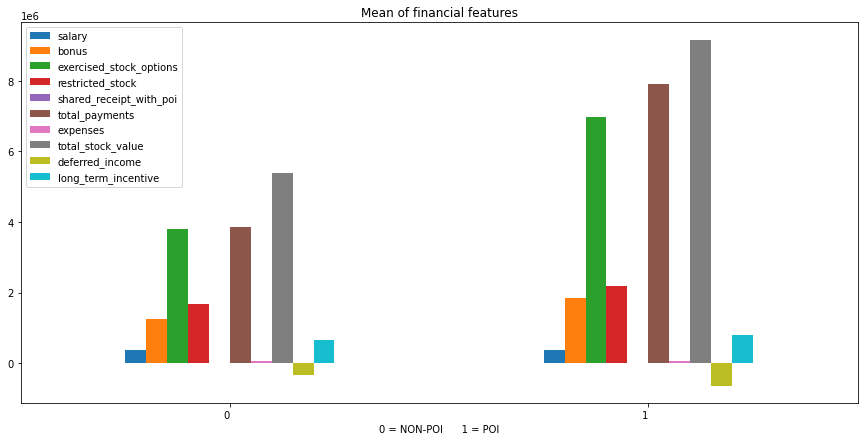

In [16]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

df_fin_poi = df.groupby('poi')[financialFeatures].mean()
fig,ax = plt.subplots(figsize=(15,7))
df_fin_poi.plot.bar(ax=ax).set_title('Mean of financial features')
plt.xticks(rotation=0, ha="right")
plt.xlabel("0 = NON-POI      1 = POI")

### choose bonus, exercised_stock_option, total_payment, total_stock_value 

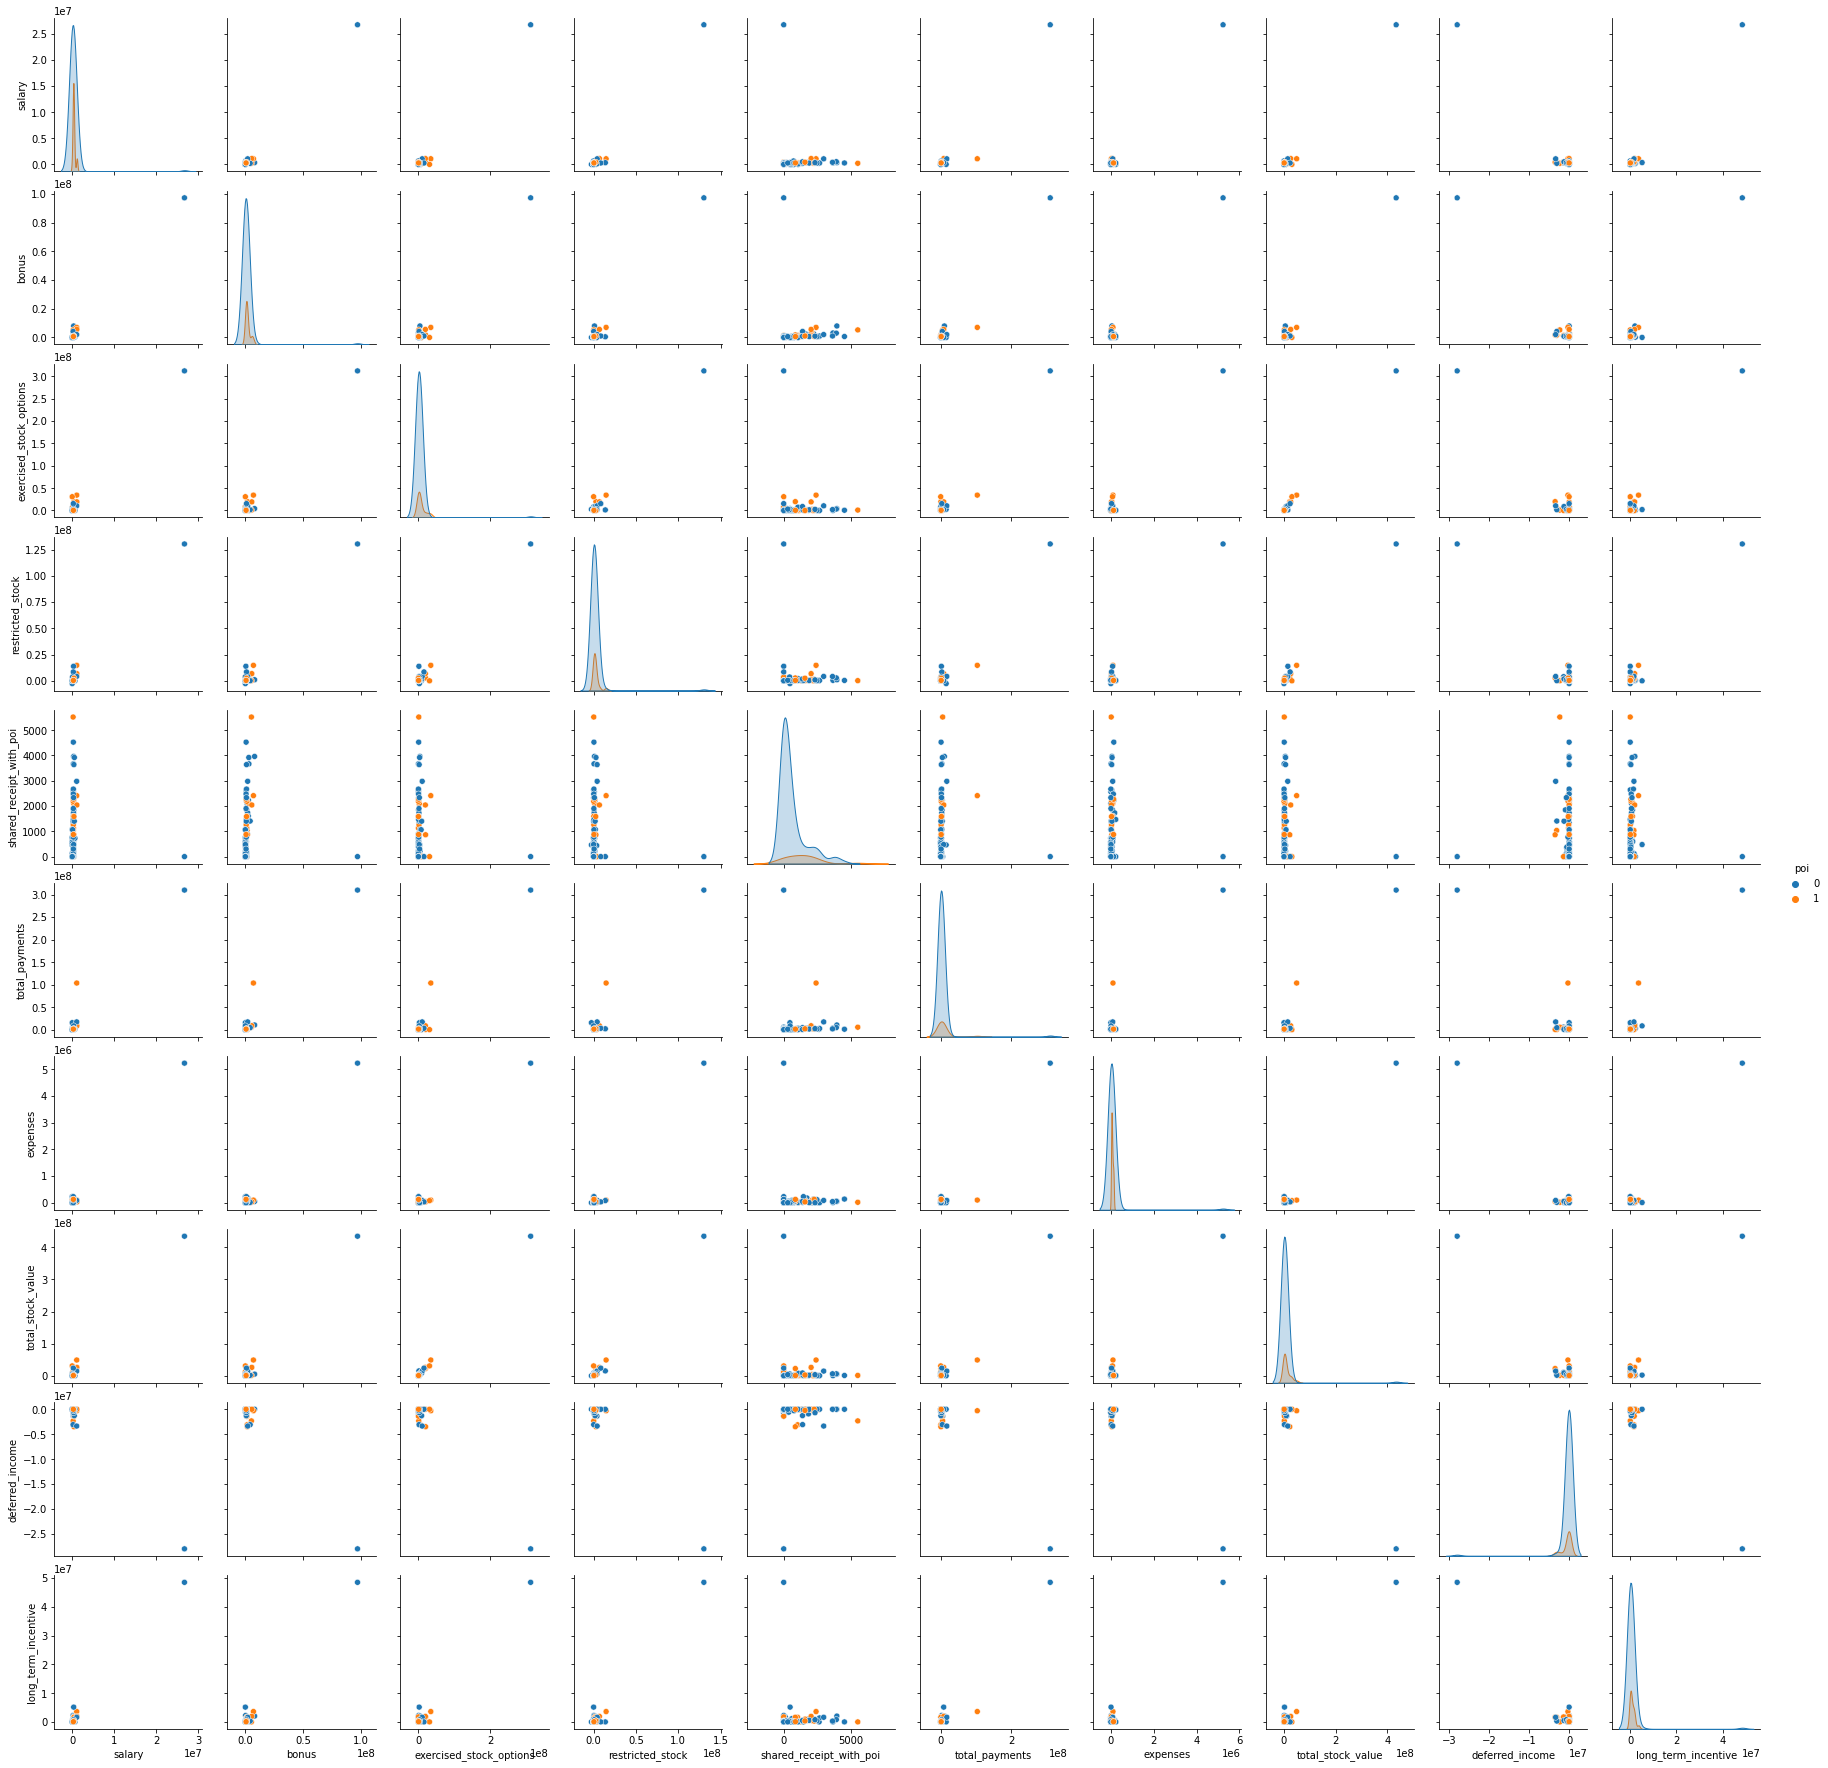

In [17]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot

check = ['salary','bonus', 'exercised_stock_options', 'restricted_stock', 'shared_receipt_with_poi',
                     'total_payments', 'expenses', 'total_stock_value', 'deferred_income', 'long_term_incentive','poi']
sns.pairplot(df[check],hue='poi')

In [18]:
df.nlargest(5,'salary') 

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
TOTAL,26704229.0,0.0,32083396.0,309886585.0,83925000.0,97343619.0,0,-7576788.0,-27992891.0,434509511.0,...,0.0,311764000.0,0.0,42667589.0,0.0,0,48521928.0,0.0,130322299.0,1398517.0
SKILLING JEFFREY K,1111258.0,3627.0,0.0,8682716.0,0.0,5600000.0,jeff.skilling@enron.com,0.0,0.0,26093672.0,...,88.0,19250000.0,108.0,22122.0,30.0,1,1920000.0,2042.0,6843672.0,0.0
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,81525000.0,7000000.0,kenneth.lay@enron.com,0.0,-300000.0,49110078.0,...,123.0,34348384.0,36.0,10359729.0,16.0,1,3600000.0,2411.0,14761694.0,0.0
FREVERT MARK A,1060932.0,3275.0,6426990.0,17252530.0,2000000.0,2000000.0,mark.frevert@enron.com,0.0,-3367011.0,14622185.0,...,242.0,10433518.0,21.0,7427621.0,6.0,0,1617011.0,2979.0,4188667.0,0.0
PICKERING MARK R,655037.0,898.0,0.0,1386690.0,400000.0,300000.0,mark.pickering@enron.com,0.0,0.0,28798.0,...,7.0,28798.0,67.0,0.0,0.0,0,0.0,728.0,0.0,0.0


In [19]:

df.drop('TOTAL',axis=0,inplace=True)


# # ##  outlier 

# outlier = df[df['salary']==df['salary'].max()]
# outlier = df[df['salary']==df['salary'].max()]


Text(0.5, 0, '0 = NON-POI      1 = POI')

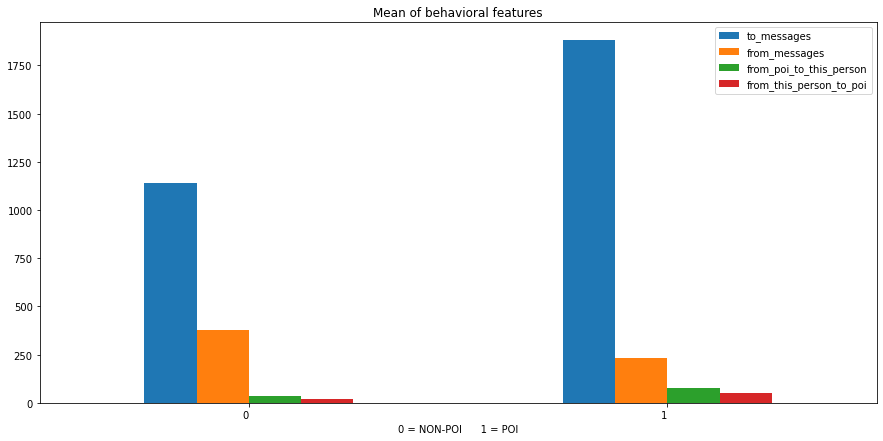

In [20]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

df_fin_poi = df.groupby('poi')[behavioralFeatures].mean()
fig,ax = plt.subplots(figsize=(15,7))
df_fin_poi.plot.bar(ax=ax).set_title('Mean of behavioral features')
plt.xticks(rotation=0, ha="right")
plt.xlabel("0 = NON-POI      1 = POI")

## to_message from_message

<AxesSubplot:>

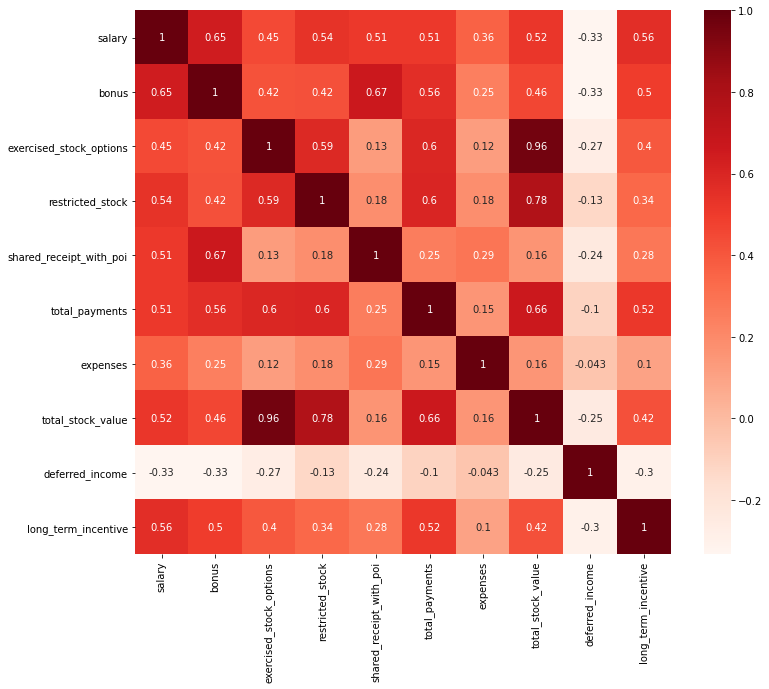

In [21]:
### heatmap 
plt.figure(figsize=(12,10))
cor=df[financialFeatures].corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)


#### check for missing and outlier 

In [22]:
df=df.drop('email_address',axis=1)

Text(0.5, 1.0, 'Correlations between POI and variables')

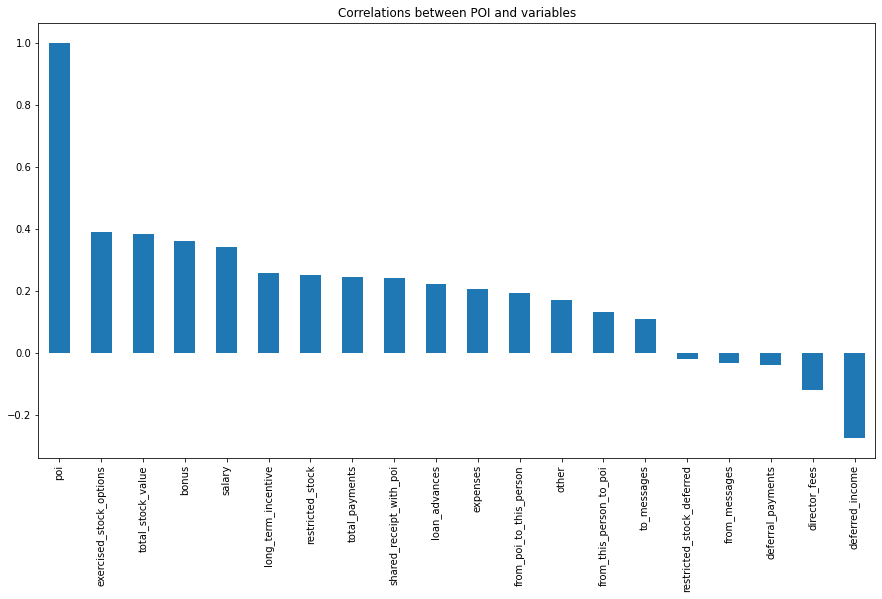

In [23]:
plt.figure(figsize=(15,8))
df.corr()['poi'].sort_values(ascending = False).plot(kind='bar')
plt.title('Correlations between POI and variables')

In [24]:
allFeatures = ['poi','salary','bonus', 'exercised_stock_options', 'restricted_stock', 'shared_receipt_with_poi',
               'total_payments', 'expenses', 'total_stock_value', 'deferred_income', 'long_term_incentive',
               'to_messages', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'other']
df['poi'] = df['poi'].apply(lambda x: int(x))

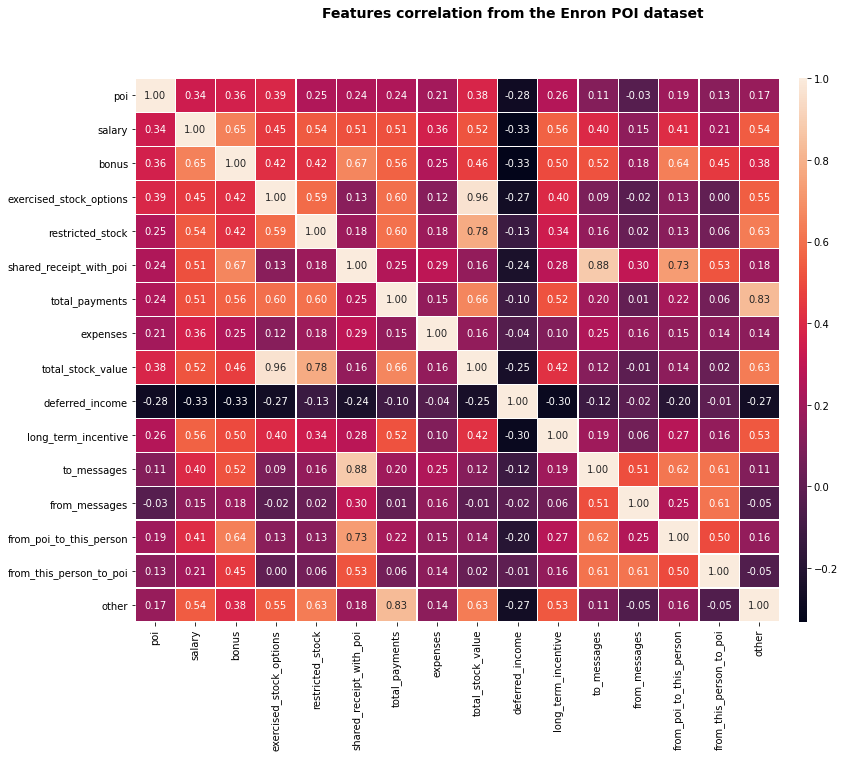

In [25]:
## Calculating the correlation among features by Pearson method
correlationDataframe = df[allFeatures].corr()

# Drawing a heatmap with the numeric values in each cell
fig1, ax = plt.subplots(figsize=(14,10))
# fig1.subplots_adjust(top=.945)
plt.suptitle('Features correlation from the Enron POI dataset', fontsize=14, fontweight='bold')

cbar_kws = {'orientation':"vertical", 'pad':0.025, 'aspect':70}
sns.heatmap(correlationDataframe, annot=True, fmt='.2f', linewidths=.3, ax=ax, cbar_kws=cbar_kws);

/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


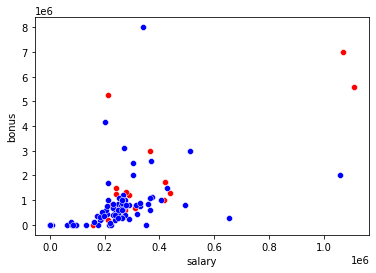

In [26]:
ax = sns.scatterplot(df[df['poi'] == True].salary, 
                     df[df['poi'] == True].bonus, color = 'r' )
ax = sns.scatterplot(df[df['poi'] == False].salary, 
                     df[df['poi'] == False].bonus, color = 'b' )

plt = ax.get_figure()

In [27]:
check= ['salary','bonus', 'exercised_stock_options',  'shared_receipt_with_poi',
                     'total_payments',  'total_stock_value','poi']


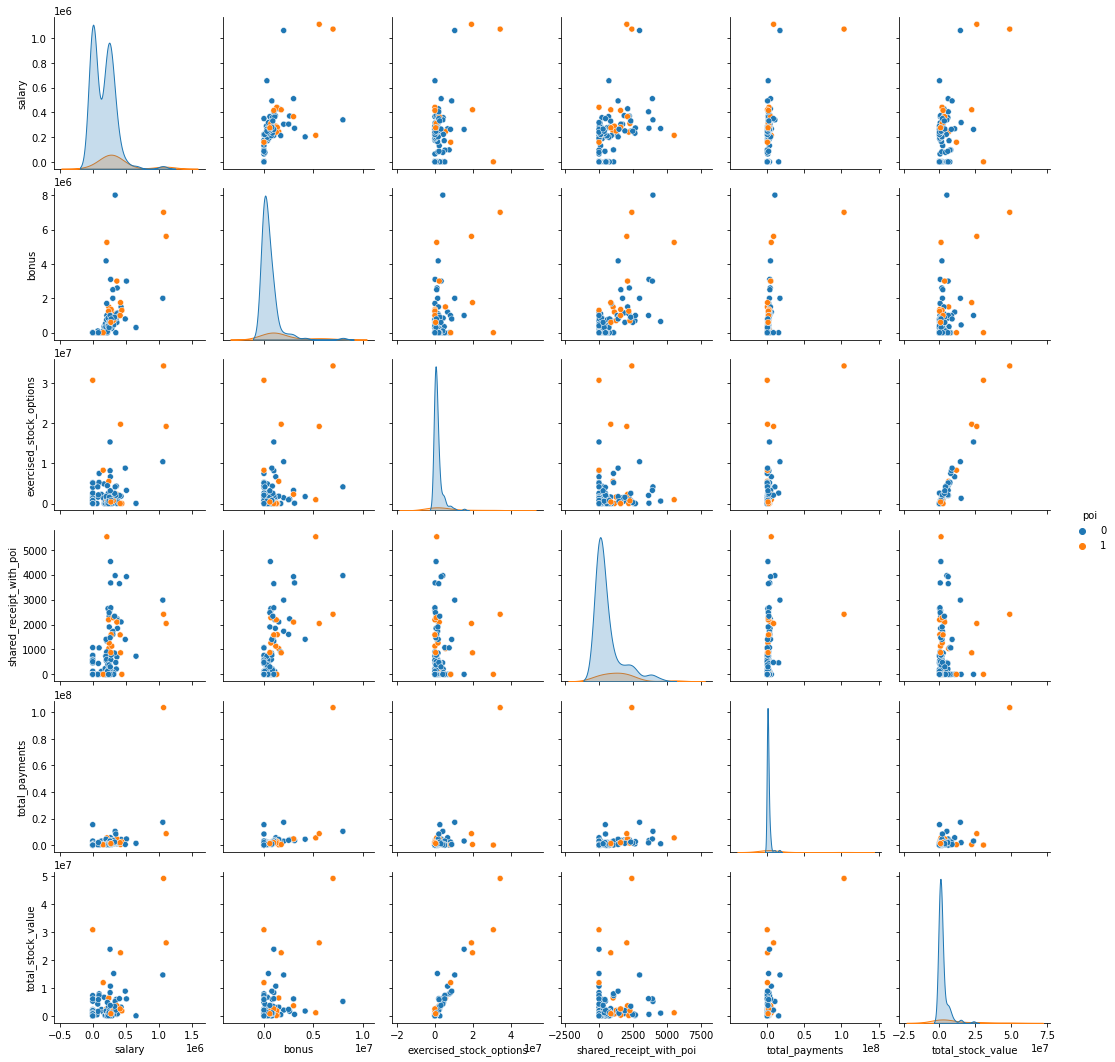

In [28]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(df[check],hue='poi')

In [29]:
df[df['total_stock_value']==df['total_stock_value'].max()]
## founder of enron not a really outlier 

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,81525000.0,7000000.0,0.0,-300000.0,49110078.0,99832.0,123.0,34348384.0,36.0,10359729.0,16.0,1,3600000.0,2411.0,14761694.0,0.0


In [30]:
df[df['total_payments']==df['total_payments'].max()]
## founder of enron not a really outlier 

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,81525000.0,7000000.0,0.0,-300000.0,49110078.0,99832.0,123.0,34348384.0,36.0,10359729.0,16.0,1,3600000.0,2411.0,14761694.0,0.0


In [31]:
df[df['total_payments']==df['total_payments'].max()]
## founder of enron not a really outlier 

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,81525000.0,7000000.0,0.0,-300000.0,49110078.0,99832.0,123.0,34348384.0,36.0,10359729.0,16.0,1,3600000.0,2411.0,14761694.0,0.0


In [32]:
df.nlargest(5,'total_payments') 

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,81525000.0,7000000.0,0.0,-300000.0,49110078.0,99832.0,123.0,34348384.0,36.0,10359729.0,16.0,1,3600000.0,2411.0,14761694.0,0.0
FREVERT MARK A,1060932.0,3275.0,6426990.0,17252530.0,2000000.0,2000000.0,0.0,-3367011.0,14622185.0,86987.0,242.0,10433518.0,21.0,7427621.0,6.0,0,1617011.0,2979.0,4188667.0,0.0
BHATNAGAR SANJAY,0.0,523.0,0.0,15456290.0,0.0,0.0,15456290.0,0.0,0.0,0.0,0.0,2604490.0,29.0,137864.0,1.0,0,0.0,463.0,-2604490.0,137864.0
LAVORATO JOHN J,339288.0,7259.0,0.0,10425757.0,0.0,8000000.0,0.0,0.0,5167144.0,49537.0,528.0,4158995.0,2585.0,1552.0,411.0,0,2035380.0,3962.0,1008149.0,0.0
SKILLING JEFFREY K,1111258.0,3627.0,0.0,8682716.0,0.0,5600000.0,0.0,0.0,26093672.0,29336.0,88.0,19250000.0,108.0,22122.0,30.0,1,1920000.0,2042.0,6843672.0,0.0


In [33]:
df.nlargest(5,'shared_receipt_with_poi') 

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
BELDEN TIMOTHY N,213999.0,7991.0,2144013.0,5501630.0,0.0,5249999.0,0.0,-2334434.0,1110705.0,17355.0,228.0,953136.0,484.0,210698.0,108.0,1,0.0,5521.0,157569.0,0.0
SHAPIRO RICHARD S,269076.0,15149.0,0.0,1057548.0,0.0,650000.0,0.0,0.0,987001.0,137767.0,74.0,607837.0,1215.0,705.0,65.0,0,0.0,4527.0,379164.0,0.0
LAVORATO JOHN J,339288.0,7259.0,0.0,10425757.0,0.0,8000000.0,0.0,0.0,5167144.0,49537.0,528.0,4158995.0,2585.0,1552.0,411.0,0,2035380.0,3962.0,1008149.0,0.0
WHALLEY LAWRENCE G,510364.0,6019.0,0.0,4677574.0,0.0,3000000.0,0.0,0.0,6079137.0,57838.0,186.0,3282960.0,556.0,301026.0,24.0,0,808346.0,3920.0,2796177.0,0.0
KITCHEN LOUISE,271442.0,8305.0,0.0,3471141.0,0.0,3100000.0,0.0,0.0,547143.0,5774.0,251.0,81042.0,1728.0,93925.0,194.0,0,0.0,3669.0,466101.0,0.0


In [34]:
df[(df['salary'] <= 0) 
                    & (df['bonus'] <= 0) 
                    & (df['restricted_stock'] <= 0) 
                    & (df['total_payments'] <= 0)
                    & (df['exercised_stock_options'] <= 0)
                    & (df['to_messages'] <= 0)]

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
LOCKHART EUGENE E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [35]:
df.drop(index='LOCKHART EUGENE E',inplace=True )

In [36]:
df[(df['salary']<=0) & (df['poi']==1)]
### no salary but still poi cuz stock value is really high 

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
HIRKO JOSEPH,0.0,0.0,10259.0,91093.0,0.0,0.0,0.0,0.0,30766064.0,77978.0,0.0,30766064.0,0.0,2856.0,0.0,1,0.0,0.0,0.0,0.0


In [37]:
df.nlargest(5,'total_stock_value')

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,81525000.0,7000000.0,0.0,-300000.0,49110078.0,99832.0,123.0,34348384.0,36.0,10359729.0,16.0,1,3600000.0,2411.0,14761694.0,0.0
HIRKO JOSEPH,0.0,0.0,10259.0,91093.0,0.0,0.0,0.0,0.0,30766064.0,77978.0,0.0,30766064.0,0.0,2856.0,0.0,1,0.0,0.0,0.0,0.0
SKILLING JEFFREY K,1111258.0,3627.0,0.0,8682716.0,0.0,5600000.0,0.0,0.0,26093672.0,29336.0,88.0,19250000.0,108.0,22122.0,30.0,1,1920000.0,2042.0,6843672.0,0.0
PAI LOU L,261879.0,0.0,0.0,3123383.0,0.0,1000000.0,0.0,0.0,23817930.0,32047.0,0.0,15364167.0,0.0,1829457.0,0.0,0,0.0,0.0,8453763.0,0.0
RICE KENNETH D,420636.0,905.0,0.0,505050.0,0.0,1750000.0,0.0,-3504386.0,22542539.0,46950.0,42.0,19794175.0,18.0,174839.0,4.0,1,1617011.0,864.0,2748364.0,0.0


In [38]:
## after deleting the outlier 

df.shape

(144, 20)

In [39]:
## create new feature v
df['perc_from_poi'] = df.from_poi_to_this_person / df.to_messages
df['perc_to_poi'] = df.from_this_person_to_poi / df.from_messages
df['bonus_salary'] = df['bonus']/df['salary']
df.fillna(0,inplace=True)

In [40]:
df.loc['THE TRAVEL AGENCY IN THE PARK']

salary                            0.0
to_messages                       0.0
deferral_payments                 0.0
total_payments               362096.0
loan_advances                     0.0
bonus                             0.0
restricted_stock_deferred         0.0
deferred_income                   0.0
total_stock_value                 0.0
expenses                          0.0
from_poi_to_this_person           0.0
exercised_stock_options           0.0
from_messages                     0.0
other                        362096.0
from_this_person_to_poi           0.0
poi                               0.0
long_term_incentive               0.0
shared_receipt_with_poi           0.0
restricted_stock                  0.0
director_fees                     0.0
perc_from_poi                     0.0
perc_to_poi                       0.0
bonus_salary                      0.0
Name: THE TRAVEL AGENCY IN THE PARK, dtype: float64

In [41]:
df.drop(index='THE TRAVEL AGENCY IN THE PARK', inplace=True)

Text(0.5, 0, '0 = NON-POI      1 = POI')

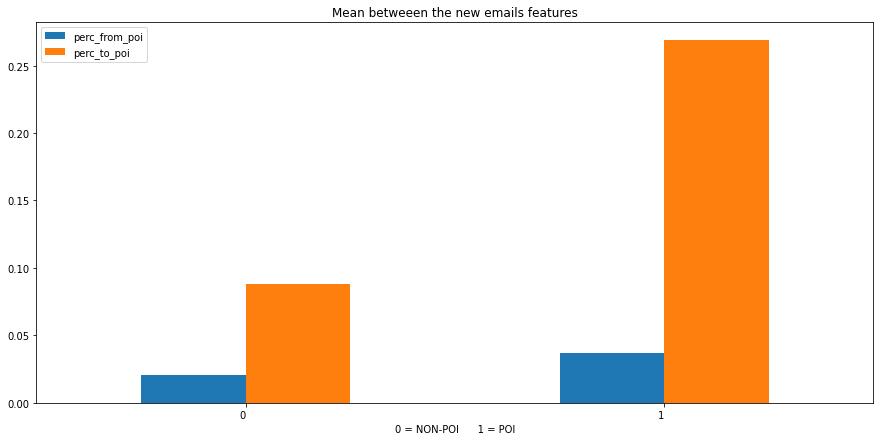

In [42]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


new_message_features = ['perc_from_poi', 'perc_to_poi']

df_messages_poi = df.groupby("poi")[new_message_features].mean()

fig, ax= plt.subplots(figsize=(15,7))

df_messages_poi.plot.bar(ax=ax).set_title('Mean betweeen the new emails features')
plt.xticks(rotation=0, ha="right")
plt.xlabel("0 = NON-POI      1 = POI")


In [48]:
## train test set split 
import sklearn
from sklearn.model_selection import train_test_split

cols = [col for col in df.columns if col not in ['poi','email_address']]

data = df[cols]

target = df['poi']

X_train, X_test, y_train,y_test = train_test_split(data,target,test_size=0.3,random_state=42)

In [49]:

model_compare= pd.DataFrame( columns = ["model_name", "accuracy score",
                                      " precision score","recall score","f1 score" ])

model_compare

,model_name,accuracy score,precision score,recall score,f1 score


In [55]:
from sklearn.ensemble import RandomForestClassifier          # 随机森林
from sklearn.svm import SVC, LinearSVC                       # 支持向量机
from sklearn.linear_model import LogisticRegression          # 逻辑回归
from sklearn.neighbors import KNeighborsClassifier           # KNN算法
from sklearn.naive_bayes import GaussianNB                   # 朴素贝叶斯
from sklearn.tree import DecisionTreeClassifier              # 决策树分类器
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score




def train_model(X_train, X_test, y_train,y_test,status):
    global model_compare

    models = ['Naive Bayes','Decision Tree','Nearest Neighbor','Random Forest','AdaBoost']


    classifiers = [GaussianNB(),
                   DecisionTreeClassifier(),
                   KNeighborsClassifier(n_neighbors=3),
                   RandomForestClassifier(), 
                   AdaBoostClassifier(base_estimator=DecisionTreeClassifier())]



    for name, clf in zip(models, classifiers):
        to_append=[]
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        to_append.append('{}_{}'.format(name,status))
        to_append.append(accuracy_score(y_test, y_pred))
        to_append.append(precision_score(y_test, y_pred))
        to_append.append(recall_score(y_test, y_pred))
        to_append.append(f1_score(y_test, y_pred))
        
        a_series = pd.Series(to_append, index = model_compare.columns)
        model_compare= model_compare.append(a_series, ignore_index=True)
        
       
        
       
  
        

In [56]:
from sklearn.model_selection import GridSearchCV
def train_model_grid(X_train, X_test, y_train,y_test,status):
    global model_compare
    models = ['Naive Bayes','Decision Tree','Nearest Neighbor','Random Forest','AdaBoost']


    classifiers = [GaussianNB(),
                   DecisionTreeClassifier(),
                   KNeighborsClassifier(n_neighbors=3),
                   RandomForestClassifier(), 
                   AdaBoostClassifier(base_estimator=DecisionTreeClassifier())]



    parameters = {"Naive Bayes":{},
     "Decision Tree":{"max_depth": range(1,15),
    "min_samples_leaf": range(1,5)},
     "Nearest Neighbor":{"n_neighbors": range(1, 10),
     "weights":("uniform", "distance"),
    "algorithm":("auto", "ball_tree", "kd_tree", "brute")},
    "Random Forest":{"n_estimators": range(1, 5),
     "min_samples_split": range(2, 5),
     "max_depth": range(2, 15),
    "min_samples_leaf": range(1, 5),
    "random_state": [0, 10, 23, 36, 42],
    "criterion": ["entropy", "gini"]},
    "AdaBoost":{"n_estimators": range(2, 5),
     "algorithm":("SAMME", "SAMME.R"),
    "random_state":[0, 10, 23, 36, 42]}}


    for name, clf in zip(models, classifiers):
        to_append=[]
        grid_clf = GridSearchCV(clf, parameters[name])
        grid_clf.fit(X_train, y_train)
        y_pred = grid_clf.predict(X_test)
        to_append.append('{}_{}'.format(name,status))
        to_append.append(accuracy_score(y_test, y_pred))
        to_append.append(precision_score(y_test, y_pred))
        to_append.append(recall_score(y_test, y_pred))
        to_append.append(f1_score(y_test, y_pred))
        a_series = pd.Series(to_append, index = model_compare.columns)
        model_compare= model_compare.append(a_series, ignore_index=True)
        
       
  

In [57]:
# first round training model
train_model(X_train, X_test, y_train,y_test,'plain')
model_compare

,model_name,accuracy score,precision score,recall score,f1 score
0,Naive Bayes_plain,0.232558,0.111111,0.8,0.195122
1,Decision Tree_plain,0.720930,0.230769,0.6,0.333333
2,Nearest Neighbor_plain,0.883721,0.500000,0.4,0.444444
3,Random Forest_plain,0.930233,0.750000,0.6,0.666667
4,AdaBoost_plain,0.720930,0.230769,0.6,0.333333


In [61]:

from sklearn.model_selection import StratifiedShuffleSplit

sss=StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)



for train_index, test_index in sss.split(data, target):
   
    X_train,X_test=data.iloc[train_index], data.iloc[test_index]
    y_train,y_test=target[train_index], target[test_index]


# In[35]:

# 输出数据集大小
print('原始数据特征：', data.shape,
      '训练数据特征：',X_train.shape,
      '测试数据特征：',X_test.shape)

print('原始数据标签：', target.shape,
      '   训练数据标签：',y_train.shape,
      '   测试数据标签：',y_test.shape)

原始数据特征： (143, 22) 训练数据特征： (114, 22) 测试数据特征： (29, 22)
原始数据标签： (143,)    训练数据标签： (114,)    测试数据标签： (29,)


In [62]:
train_model(X_train, X_test, y_train,y_test,'sssplit')
model_compare

,model_name,accuracy score,precision score,recall score,f1 score
0,Naive Bayes_plain,0.232558,0.111111,0.80,0.195122
1,Decision Tree_plain,0.720930,0.230769,0.60,0.333333
2,Nearest Neighbor_plain,0.883721,0.500000,0.40,0.444444
3,Random Forest_plain,0.930233,0.750000,0.60,0.666667
4,AdaBoost_plain,0.720930,0.230769,0.60,0.333333
5,Naive Bayes_sssplit,0.655172,0.000000,0.00,0.000000
6,Decision Tree_sssplit,0.793103,0.375000,0.75,0.500000
7,Nearest Neighbor_sssplit,0.827586,0.000000,0.00,0.000000
8,Random Forest_sssplit,0.793103,0.000000,0.00,0.000000
9,AdaBoost_sssplit,0.896552,0.600000,0.75,0.666667


In [63]:
# balance data 
class_count_0, class_count_1 = df['poi'].value_counts()
class_0 = df[df['poi'] == 0]
class_1 = df[df['poi'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)


class 0: (125, 23)
class 1: (18, 23)


In [64]:

from collections import Counter
from imblearn.over_sampling import SMOTE


SMOTE = SMOTE()

# 获得过采样后的样本
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# 统计过采样后的类别占比情况
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({0: 100, 1: 100})


In [65]:
## model training after balancing data
train_model(X_train_SMOTE, X_test, y_train_SMOTE,y_test,'oversampling')
model_compare

,model_name,accuracy score,precision score,recall score,f1 score
0,Naive Bayes_plain,0.232558,0.111111,0.80,0.195122
1,Decision Tree_plain,0.720930,0.230769,0.60,0.333333
2,Nearest Neighbor_plain,0.883721,0.500000,0.40,0.444444
3,Random Forest_plain,0.930233,0.750000,0.60,0.666667
4,AdaBoost_plain,0.720930,0.230769,0.60,0.333333
5,Naive Bayes_sssplit,0.655172,0.000000,0.00,0.000000
6,Decision Tree_sssplit,0.793103,0.375000,0.75,0.500000
7,Nearest Neighbor_sssplit,0.827586,0.000000,0.00,0.000000
8,Random Forest_sssplit,0.793103,0.000000,0.00,0.000000
9,AdaBoost_sssplit,0.896552,0.600000,0.75,0.666667


In [66]:
train_model_grid(X_train, X_test, y_train,y_test,'gridsearch')
model_compare

,model_name,accuracy score,precision score,recall score,f1 score
0,Naive Bayes_plain,0.232558,0.111111,0.80,0.195122
1,Decision Tree_plain,0.720930,0.230769,0.60,0.333333
2,Nearest Neighbor_plain,0.883721,0.500000,0.40,0.444444
3,Random Forest_plain,0.930233,0.750000,0.60,0.666667
4,AdaBoost_plain,0.720930,0.230769,0.60,0.333333
5,Naive Bayes_sssplit,0.655172,0.000000,0.00,0.000000
6,Decision Tree_sssplit,0.793103,0.375000,0.75,0.500000
7,Nearest Neighbor_sssplit,0.827586,0.000000,0.00,0.000000
8,Random Forest_sssplit,0.793103,0.000000,0.00,0.000000
9,AdaBoost_sssplit,0.896552,0.600000,0.75,0.666667


In [68]:
## feature selection
from sklearn.feature_selection import SelectKBest

selector = SelectKBest()

X_new = selector.fit_transform(X_train, y_train)
names = X_train.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)



                Feat_names   F_Scores
1                    bonus  36.635314
3        total_stock_value  32.359522
5  exercised_stock_options  31.618981
0                   salary  21.445210
2          deferred_income  17.990208
7         restricted_stock  17.504830
9             bonus_salary  15.779751
6      long_term_incentive  10.781375
8              perc_to_poi  10.252265
4  from_poi_to_this_person  10.161437


In [69]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest()

X_new = selector.fit_transform(data,target)
names = data.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted2 = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted2)


                Feat_names   F_Scores
5  exercised_stock_options  24.815080
4        total_stock_value  24.182899
2                    bonus  20.792252
0                   salary  18.289684
8              perc_to_poi  16.409713
3          deferred_income  11.458477
9             bonus_salary  10.783585
6      long_term_incentive   9.922186
7         restricted_stock   9.212811
1           total_payments   8.772778


In [70]:
feature_list = pd.concat([ns_df_sorted2.Feat_names, ns_df_sorted.Feat_names]) # i've run out of names
feature_list=list(set(feature_list.tolist()))
feature_list
len(feature_list)

11

In [71]:
# after select feature

import sklearn
from sklearn.model_selection import train_test_split

cols= [col for col in df.columns if col in feature_list]

data_sel = df[cols]

target = df['poi']

X_train, X_test, y_train,y_test = train_test_split(data_sel,target,test_size=0.3,random_state=42)





In [72]:
train_model(X_train, X_test, y_train,y_test,'feature_select')
model_compare

,model_name,accuracy score,precision score,recall score,f1 score
0,Naive Bayes_plain,0.232558,0.111111,0.80,0.195122
1,Decision Tree_plain,0.720930,0.230769,0.60,0.333333
2,Nearest Neighbor_plain,0.883721,0.500000,0.40,0.444444
3,Random Forest_plain,0.930233,0.750000,0.60,0.666667
4,AdaBoost_plain,0.720930,0.230769,0.60,0.333333
5,Naive Bayes_sssplit,0.655172,0.000000,0.00,0.000000
6,Decision Tree_sssplit,0.793103,0.375000,0.75,0.500000
7,Nearest Neighbor_sssplit,0.827586,0.000000,0.00,0.000000
8,Random Forest_sssplit,0.793103,0.000000,0.00,0.000000
9,AdaBoost_sssplit,0.896552,0.600000,0.75,0.666667


In [73]:
feature_list= ['bonus', 'exercised_stock_options',
                     'total_payments', 'total_stock_value']

In [74]:
## select feature doesn't really work 

## try feature scaling 

from sklearn.preprocessing import MinMaxScaler

cols = [col for col in df.columns if col not in ['poi','email_address']]

data = df[cols]

scaler = MinMaxScaler()
scaler.fit(data)

target = df['poi']

X_train, X_test, y_train,y_test = train_test_split(data,target,test_size=0.3,random_state=42)



In [75]:
train_model(X_train, X_test, y_train,y_test,'feature_select_manual')
model_compare

,model_name,accuracy score,precision score,recall score,f1 score
0,Naive Bayes_plain,0.232558,0.111111,0.80,0.195122
1,Decision Tree_plain,0.720930,0.230769,0.60,0.333333
2,Nearest Neighbor_plain,0.883721,0.500000,0.40,0.444444
3,Random Forest_plain,0.930233,0.750000,0.60,0.666667
4,AdaBoost_plain,0.720930,0.230769,0.60,0.333333
5,Naive Bayes_sssplit,0.655172,0.000000,0.00,0.000000
6,Decision Tree_sssplit,0.793103,0.375000,0.75,0.500000
7,Nearest Neighbor_sssplit,0.827586,0.000000,0.00,0.000000
8,Random Forest_sssplit,0.793103,0.000000,0.00,0.000000
9,AdaBoost_sssplit,0.896552,0.600000,0.75,0.666667


In [76]:
model_compare.nlargest(5,' precision score')

,model_name,accuracy score,precision score,recall score,f1 score
3,Random Forest_plain,0.930233,0.750000,0.60,0.666667
18,Random Forest_gridsearch,0.896552,0.666667,0.50,0.571429
9,AdaBoost_sssplit,0.896552,0.600000,0.75,0.666667
2,Nearest Neighbor_plain,0.883721,0.500000,0.40,0.444444
27,Nearest Neighbor_feature_select_manual,0.883721,0.500000,0.40,0.444444


In [77]:
from sklearn.preprocessing import MinMaxScaler

cols = [col for col in df.columns if col not in ['poi','email_address']]

data = df[cols]

scaler = MinMaxScaler()
scaler.fit(data)

target = df['poi']

X_train, X_test, y_train,y_test = train_test_split(data,target,test_size=0.3,random_state=42)

In [78]:
train_model(X_train, X_test, y_train,y_test,'new_feature')
model_compare

,model_name,accuracy score,precision score,recall score,f1 score
0,Naive Bayes_plain,0.232558,0.111111,0.80,0.195122
1,Decision Tree_plain,0.720930,0.230769,0.60,0.333333
2,Nearest Neighbor_plain,0.883721,0.500000,0.40,0.444444
3,Random Forest_plain,0.930233,0.750000,0.60,0.666667
4,AdaBoost_plain,0.720930,0.230769,0.60,0.333333
5,Naive Bayes_sssplit,0.655172,0.000000,0.00,0.000000
6,Decision Tree_sssplit,0.793103,0.375000,0.75,0.500000
7,Nearest Neighbor_sssplit,0.827586,0.000000,0.00,0.000000
8,Random Forest_sssplit,0.793103,0.000000,0.00,0.000000
9,AdaBoost_sssplit,0.896552,0.600000,0.75,0.666667


In [79]:
model_compare.nlargest(5,' precision score')

,model_name,accuracy score,precision score,recall score,f1 score
3,Random Forest_plain,0.930233,0.750000,0.60,0.666667
18,Random Forest_gridsearch,0.896552,0.666667,0.50,0.571429
9,AdaBoost_sssplit,0.896552,0.600000,0.75,0.666667
2,Nearest Neighbor_plain,0.883721,0.500000,0.40,0.444444
27,Nearest Neighbor_feature_select_manual,0.883721,0.500000,0.40,0.444444


In [90]:
### implementing 
import random 

ramdon_index= []

for i in range(10):
    ramdon_index.append(random.randint(0,len(df)))

pred_X = data.iloc[ramdon_index]




In [92]:

# 使用朴素贝叶斯方法，对预测数据集中的生存情况进行预测
model = RandomForestClassifier()

X_train, X_test, y_train,y_test = train_test_split(data, target ,test_size=0.3,random_state=42)

model.fit(X_train,y_train)
pred_y = model.predict(pred_X)


pre_poi=target.iloc[ramdon_index]


# 预测结果
predDf = pd.DataFrame({'poi':pre_poi, 'pred':pred_y})
print(predDf)

                      poi  pred
SKILLING JEFFREY K      1     1
LINDHOLM TOD A          0     0
SHERRIFF JOHN R         0     0
DERRICK JR. JAMES V     0     1
MCCLELLAN GEORGE        0     0
SAVAGE FRANK            0     0
DONAHUE JR JEFFREY M    0     0
KEAN STEVEN J           0     0
FOWLER PEGGY            0     0
RIEKER PAULA H          1     1
